In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from acquire import wrangle_store_data
from prepare import index_time_data

In [2]:
df = wrangle_store_data()

In [3]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [4]:
df['sale_total'] = df.sale_amount * df.item_price

In [5]:
df = index_time_data(df, 'sale_date')

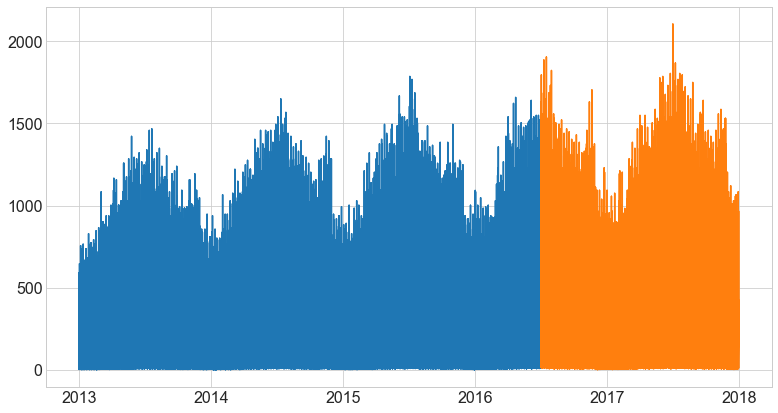

In [6]:
train_size = 0.70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index]
test = df[test_start_index:]

train = df[:'2016']
test = df['2017']
plt.plot(train.index, train.sale_total)
plt.plot(test.index, test.sale_total)

In [7]:
y = train.sale_total

<AxesSubplot:xlabel='sale_total', ylabel='Count'>

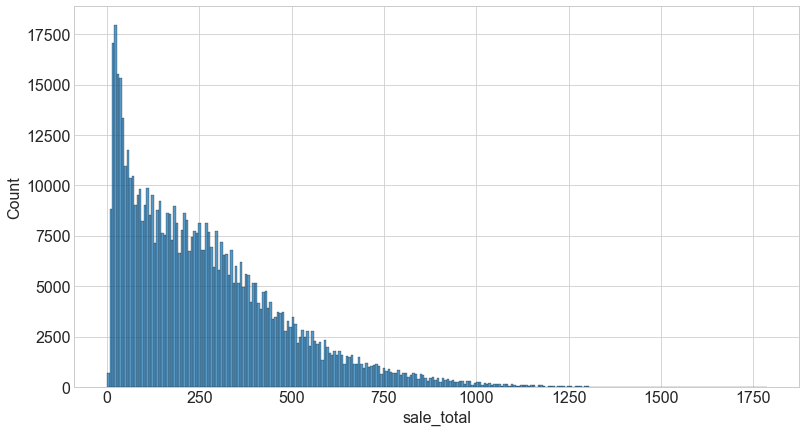

In [8]:
sns.histplot(y)

In [9]:
train.groupby('month').describe()

store_id                                                item_id  \
         count      mean       std  min  25%  50%  75%   max    count   
month                                                                   
1      62000.0  5.500000  2.872304  1.0  3.0  5.5  8.0  10.0  62000.0   
2      56500.0  5.500000  2.872307  1.0  3.0  5.5  8.0  10.0  56500.0   
3      62000.0  5.500000  2.872304  1.0  3.0  5.5  8.0  10.0  62000.0   
4      60000.0  5.500000  2.872305  1.0  3.0  5.5  8.0  10.0  60000.0   
5      62000.0  5.500000  2.872304  1.0  3.0  5.5  8.0  10.0  62000.0   
6      60000.0  5.500000  2.872305  1.0  3.0  5.5  8.0  10.0  60000.0   
7      47100.0  5.499915  2.872334  1.0  3.0  5.5  8.0  10.0  47100.0   
8      46500.0  5.500000  2.872312  1.0  3.0  5.5  8.0  10.0  46500.0   
9      45000.0  5.500000  2.872313  1.0  3.0  5.5  8.0  10.0  45000.0   
10     46500.0  5.500000  2.872312  1.0  3.0  5.5  8.0  10.0  46500.0   
11     45000.0  5.500000  2.872313  1.0  3.0  5.5  8.0  10.0  45000.0   
12     46500.0  5.500000  2.872312  1.0  3.0  5.5  8.0  10.0  46500.0   

                  ... sale_total              year                         \
            mean  ...        75%      max    count         mean       std   
month             ...                                                       
1      25.500000  ...   268.1500  1093.20  62000.0  2014.500000  1.118043   
2      25.500000  ...   295.7400  1065.87  56500.0  2014.513274  1.121916   
3      25.500000  ...   354.3800  1421.16  62000.0  2014.500000  1.118043   
4      25.500000  ...   411.6000  1658.02  60000.0  2014.500000  1.118043   
5      25.500000  ...   444.8600  1512.26  62000.0  2014.500000  1.118043   
6      25.500000  ...   472.2900  1667.13  60000.0  2014.500000  1.118043   
7      25.498493  ...   482.5600  1785.56  47100.0  2014.025478  0.841722   
8      25.500000  ...   427.8900  1484.93  46500.0  2014.000000  0.816505   
9      25.500000  ...   395.1600  1393.83  45000.0  2014.000000  0.816506   
10     25.500000  ...   369.1525  1384.72  46500.0  2014.000000  0.816505   
11     25.500000  ...   399.5225  1494.04  45000.0  2014.000000  0.816506   
12     25.500000  ...   282.9600  1002.10  46500.0  2014.000000  0.816505   

                                                 
          min      25%     50%      75%     max  
month                                            
1      2013.0  2013.75  2014.5  2015.25  2016.0  
2      2013.0  2014.00  2015.0  2016.00  2016.0  
3      2013.0  2013.75  2014.5  2015.25  2016.0  
4      2013.0  2013.75  2014.5  2015.25  2016.0  
5      2013.0  2013.75  2014.5  2015.25  2016.0  
6      2013.0  2013.75  2014.5  2015.25  2016.0  
7      2013.0  2013.00  2014.0  2015.00  2016.0  
8      2013.0  2013.00  2014.0  2015.00  2015.0  
9      2013.0  2013.00  2014.0  2015.00  2015.0  
10     2013.0  2013.00  2014.0  2015.00  2015.0  
11     2013.0  2013.00  2014.0  2015.00  2015.0  
12     2013.0  2013.00  2014.0  2015.00  2015.0  

[12 rows x 80 columns]

<AxesSubplot:xlabel='month', ylabel='sale_total'>

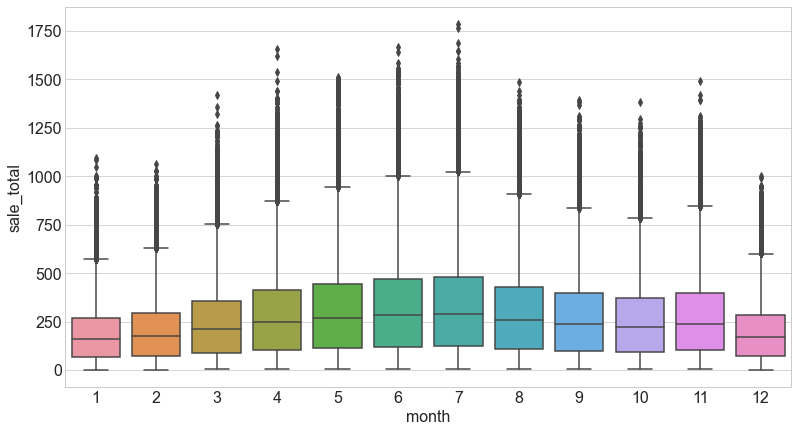

In [10]:
sns.boxplot(data = train, x = 'month', y = 'sale_total')

<AxesSubplot:xlabel='day of the week', ylabel='sale_total'>

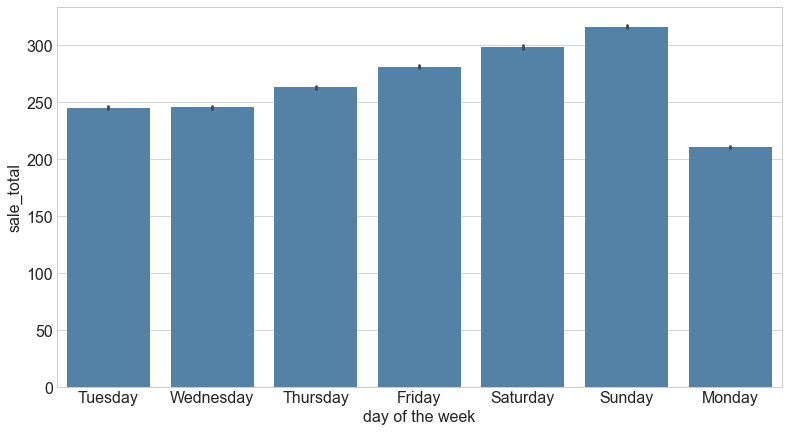

In [11]:
sns.barplot(data=train, x='day of the week', y='sale_total', color='steelblue')\
    #.set(title='Average Temperature by Day of Week')